In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 5220-A98C

 Directory of C:\Users\abc\OneDrive\Desktop\excelr\Assignments\Simple_Linear_Regression

24/08/2022  07:52    <DIR>          .
24/08/2022  07:52    <DIR>          ..
24/08/2022  07:48    <DIR>          .ipynb_checkpoints
24/08/2022  07:52               878 Assignment_4_Q2_Simple_Linear_Regrression_NihalInamdar.ipynb
24/08/2022  07:47            85,735 Assignment_4_Simple_Linear_Regrression_NihalInamdar.ipynb
23/08/2022  08:18               218 delivery_time.csv
23/08/2022  08:18               318 Problem_statements.txt
23/08/2022  08:18               454 Salary_Data.csv
               5 File(s)         87,603 bytes
               3 Dir(s)  20,851,453,952 bytes free


In [17]:
data=pd.read_csv('Salary_Data.csv')
data.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

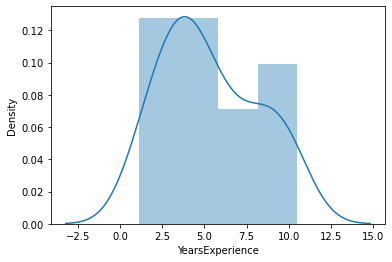

In [8]:
sns.distplot(data['YearsExperience'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

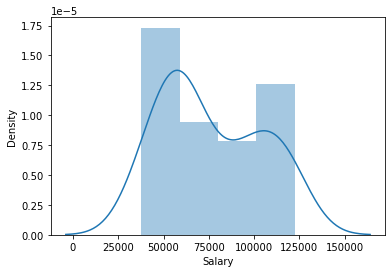

In [9]:
sns.distplot(data['Salary'])

# Correlation analysis

In [10]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

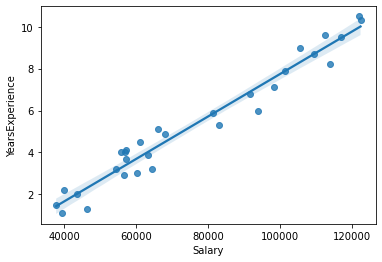

In [11]:
sns.regplot(x=data['Salary'],y=data['YearsExperience'])

# Model Building

In [28]:
model=smf.ols("Salary~YearsExperience",data=data).fit()

# Model Testing

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 25 Aug 2022   Prob (F-statistic):           1.14e-20
Time:                        08:20:53   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [15]:
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [16]:
model.rsquared, model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# Model Predictions

In [19]:
# Manual prediction for 2 Years Experience
Salary= 2*(9449.962321) + 25792.200199
Salary


44692.124841

In [22]:
new_data=pd.Series([2,3])
new_data

0    2
1    3
dtype: int64

In [26]:
data_pred=pd.DataFrame(new_data, columns=["YearsExperience"])
data_pred

,YearsExperience
0,2
1,3


In [27]:
model.predict(data_pred)

0    44692.124842
1    54142.087163
dtype: float64